#### Research Objectives:
- Explore the top three squads with the highest goals.
- Build a model to predict the total matches a sqUad played based on some selected features.

#### Import the required Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= (12,8)
sns.set_style('darkgrid')
sns.set_palette('hls')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Read in the CSV File

In [2]:
fifa = pd.read_csv("womens-world-cup.csv")
fifa.head()

,id,squad,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,...,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,1,Argentina,2019,18,26.8,34.7,3,33,270,3.0,...,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67
1,2,Australia,2019,18,25.4,61.3,4,44,390,4.3,...,8,0,1,2.0,0.0,1.85,0.92,2.77,1.85,2.77
2,3,Brazil,2019,18,29.7,51.5,4,44,390,4.3,...,5,2,3,7.0,0.0,1.62,0.69,2.31,1.15,1.85
3,4,Cameroon,2019,20,27.7,36.0,4,44,360,4.0,...,3,0,0,6.0,0.0,0.75,0.75,1.50,0.75,1.50
4,5,Canada,2019,16,27.0,63.0,4,44,360,4.0,...,4,0,1,2.0,0.0,1.00,0.75,1.75,1.00,1.75


#### Data Exploration

In [3]:
#get the shape of the dataset

fifa.shape

(136, 22)

In [4]:
#information about the dataset 

fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   id                                             136 non-null    int64  
 1   squad                                          136 non-null    object 
 2   year                                           136 non-null    int64  
 3   players                                        136 non-null    int64  
 4   age                                            136 non-null    float64
 5   possesion                                      96 non-null     float64
 6   matches_played                                 136 non-null    int64  
 7   starts                                         136 non-null    int64  
 8   min_playing_time                               136 non-null    int64  
 9   minutes_played_90s                             136 non

In [5]:
#check for duplicate

duplicated = fifa[fifa.duplicated()]
print(f'Duplicate values are :{len(duplicated)}')

Duplicate values are :0


In [6]:
#check for missing values

def missing_num(x):
    return sum(x.isnull())

print('Missing values per column')


print(fifa.apply(missing_num, axis=0).where(lambda x: x!=0).dropna())

Missing values per column
possesion       40.0
yellow_cards    74.0
red_cards       74.0
dtype: float64


##### Data Cleaning

In [12]:
#handling missing values

#fill in the missing values in the possession column with the median of the column values
fifa['possesion'] = fifa['possesion'].fillna(fifa['possesion'].median())

#fill in the missing values in the red/yellow cards columns with zero
fifa['red_cards'].fillna(value= 0, inplace= True)
fifa['yellow_cards'].fillna(value= 0, inplace= True)

In [16]:
#Changing the datatype of year column to str

fifa.year = fifa.year.astype(str)

#### Descriptive Statistics

In [18]:
#Statistical summary of numerical columns

fifa.describe()

,id,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,68.500000,17.330882,25.274265,49.295588,4.176471,45.941176,378.147059,4.200735,6.566176,3.154412,6.161765,0.404412,0.463235,1.132353,0.036765,1.375735,0.651324,2.027574,1.294265,1.946397
std,39.403892,1.712936,1.962462,5.524194,1.298902,14.287920,122.916565,1.361780,5.764132,3.612486,5.528674,0.754038,0.859872,2.054115,0.188879,0.923320,0.633787,1.405935,0.898872,1.365997
min,1.000000,13.000000,18.200000,30.000000,3.000000,33.000000,240.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.750000,16.000000,24.275000,48.075000,3.000000,33.000000,270.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.670000,0.000000,1.000000,0.600000,0.787500
50%,68.500000,17.000000,25.300000,49.400000,4.000000,44.000000,360.000000,4.000000,5.000000,2.000000,4.500000,0.000000,0.000000,0.000000,0.000000,1.250000,0.500000,1.750000,1.075000,1.725000
75%,102.250000,18.000000,26.800000,51.850000,5.000000,55.000000,480.000000,5.300000,10.000000,5.000000,9.000000,1.000000,1.000000,1.250000,0.000000,1.947500,1.000000,3.000000,1.800000,3.000000
max,136.000000,23.000000,29.700000,63.000000,7.000000,77.000000,690.000000,7.700000,25.000000,17.000000,25.000000,4.000000,4.000000,8.000000,1.000000,4.690000,2.430000,6.750000,4.500000,6.560000


In [19]:
#summary statistics of categorical columns

fifa.describe(include=['object'])

,squad,year
count,136,136
unique,36,8
top,Sweden,2019
freq,8,24


#### Insights:
1. The dataset has 136 rows and 22 columns.
2. The minimum number of players per squad was 13 and the maximum number was 23.
3. There are 36 unique squads.

#### Predictive Model

<AxesSubplot:>

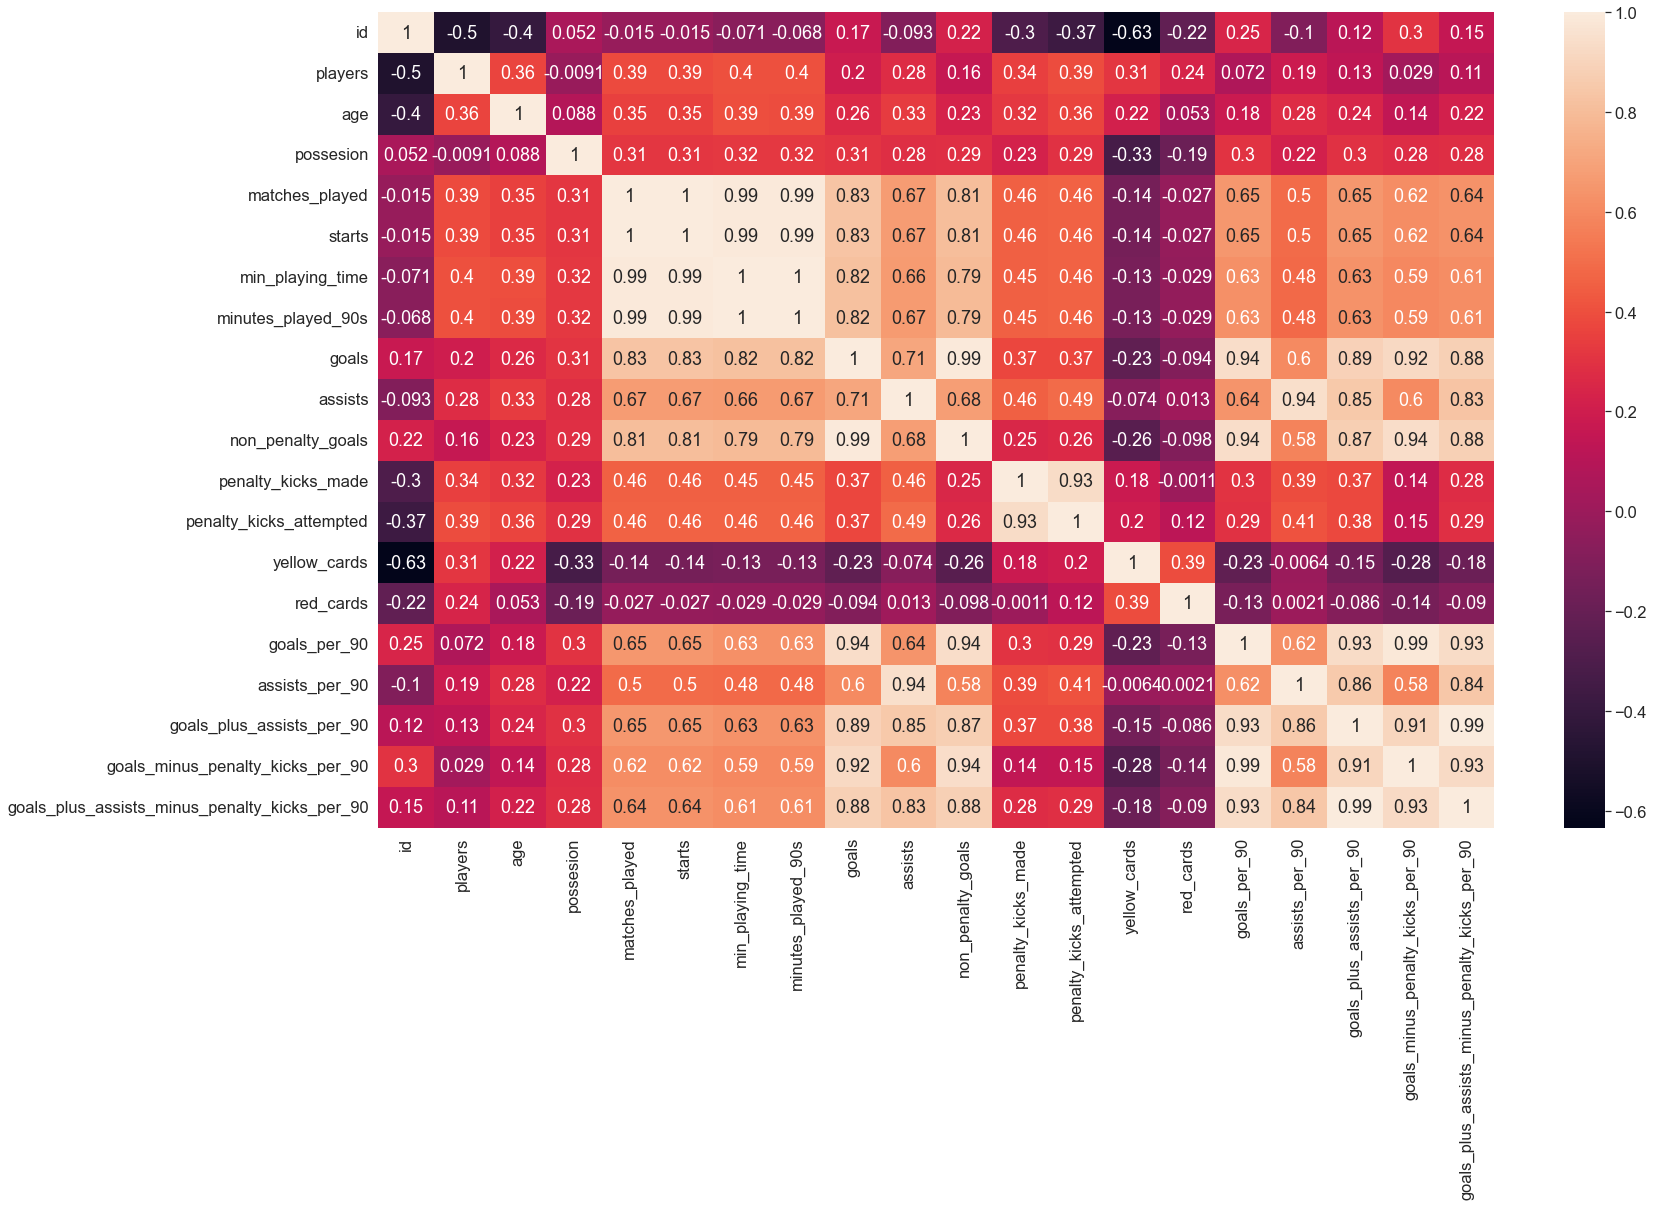

In [22]:
#heatmap to visualize correlation between features and target(matches played)

plt.figure(figsize=(25,15))
sns.set(font_scale=1.5)

sns.heatmap(fifa.corr(), annot=True)

- Based on the heatmap, the following features have high correlation with the target(matches_played):
1. Starts
2. min_playing_time
3. minutes_played_90
4. goals
5. assists
6. non_penalty_goals
7. goals_per_90
8. assists_per_90
9. goals_plus_assists_per_90
10. goals_minus_penalty_kicks_per_90
11. goals_plus_assists_minus_penalty_kicks_per_90

- To build the predictive model, the following features will be used:
1. Starts
2. min_playing_time
3. minutes_played_90
4. goals
5. assists
6. non_penalty_goals



In [24]:
#create a dataframe that contains the features of interest

df = fifa[['starts','min_playing_time','minutes_played_90s','goals','assists','non_penalty_goals','matches_played']]
df

,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,matches_played
0,33,270,3.0,2,1,1,3
1,44,390,4.3,8,4,8,4
2,44,390,4.3,7,3,5,4
3,44,360,4.0,3,3,3,4
4,44,360,4.0,4,3,4,4
...,...,...,...,...,...,...,...
131,33,240,2.7,1,1,1,3
132,33,240,2.7,0,0,0,3
133,66,500,5.6,13,6,12,6
134,66,480,5.3,17,11,16,6


In [25]:
X = df.iloc[:,:6]
y = df.iloc[:,6]

In [26]:
#split the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
#get the shape of the test and train dataset

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (108, 6)
y_train: (108,)
X_test: (28, 6)
y_test: (28,)


In [28]:
#call the linear regression model

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [29]:
#predict using the linear regression model

y_pred = linreg.predict(X_test)
y_pred

array([4., 5., 6., 3., 3., 4., 3., 3., 4., 5., 3., 6., 3., 5., 4., 3., 3.,
       4., 3., 6., 6., 3., 3., 7., 4., 4., 7., 4.])

In [30]:
#check the accuracy of the model

accuracy = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f' %accuracy)

Accuracy of the model is 100.00


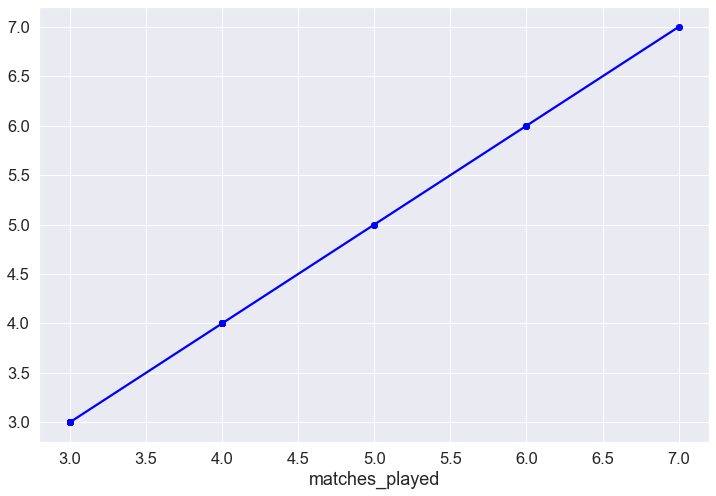

In [32]:
#scatter plot to check the relationship between predicted and actual values

sns.regplot(x=y_test,y=y_pred,ci=None, color='blue');

In [35]:
#putting the predictive model to test

features = np.array([[33,240,2.7,1,1,1]])

In [36]:
predict = linreg.predict(features)
print('Predicted match played is %.0f' %predict)

Predicted match played is 3
